In [ ]:
import pandas as pd
import sqlalchemy as sql
import datetime
import pymysql

# read password and user to database
credentials_file = r'./credentials.pw'

credentials = pd.read_csv(credentials_file, header=0)
user = credentials['username'].values[0]
pw = credentials['password'].values[0]

host="twofast-rpi3-0"  # your host
user='reader' # username
passwd='heiko'  # password
db="NG_twofast_DB" # name of the database
connect_string = 'mysql+pymysql://%(user)s:%(pw)s@%(host)s:3306/%(db)s'% {"user": user, "pw": pw, "host": host, "db": db}
sql_engine = sql.create_engine(connect_string)



def truncateTable(tableName):
    sql_engine.execute("TRUNCATE TABLE %(tbl)s" % {"tbl": tableName})
    

def switchDLLstateInControlTable(sql_engine):
    timeExecuted = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    sql_engine.execute("UPDATE microwave_generator_control SET DLL_on = 1 - DLL_on, time = '%(timeExecuted)s' WHERE id = 1" % {"timeExecuted": timeExecuted})

def initializeDLLstateValue(sql_engine):
    sql_engine.execute("INSERT INTO microwave_generator_control (DLL_on) VALUES (0)")
    
def getState(sql_engine):
    """
    Reads the last 10 entries of the two temperatures and returns it in a dataframe
    """
    query = "SELECT * FROM microwave_generator_state ORDER BY id DESC LIMIT 10"
    df = pd.read_sql(query, sql_engine)

    # columns: time (timestamp), relais_5 (tinyint), relais_24 (tinyint), rf_status (tinyint), id (primary key)
    return df

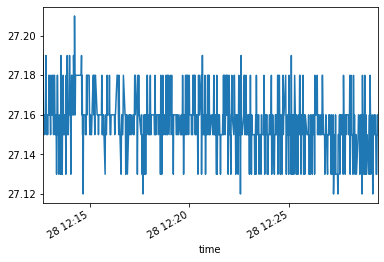

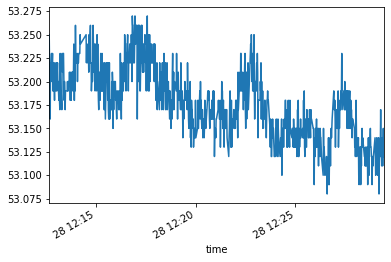

In [30]:
import pandas as pd
import sqlalchemy as sql
import datetime
import pymysql
import matplotlib.pyplot as plt
%matplotlib inline

host="twofast-rpi3-0"  # your host
user='reader' # username
pw='heiko'  # password
db="NG_twofast_DB" # name of the database
connect_string = 'mysql+pymysql://%(user)s:%(pw)s@%(host)s:3306/%(db)s'% {"user": user, "pw": pw, "host": host, "db": db}
sql_engine = sql.create_engine(connect_string)

def insert_to_db(sql_engine, temp, humid):
    sql_engine.execute("INSERT INTO temp_humid_sensor (temp, humid) VALUES (%(temp)s, %(humid)s)" % {"temp":temp, "humid":humid})

def read_db(sql_engine, table):
    """
    Reads the last 10 entries of the two temperatures and returns it in a dataframe
    """
    query = "SELECT * FROM %(tableName)s ORDER BY id" % {"tableName": table}
    df = pd.read_sql(query, sql_engine)
    return df

data = read_db(sql_engine, 'temp_humid_sensor')
data.set_index('time', inplace=True)
temp = data['temp']
temp = temp[ temp >0 ]
temp.plot()
plt.show()

humid = data['humid']
humid = humid[ humid >0 ]
humid.plot()
plt.show()

In [34]:
data['2019-08-28 12:27:50':'2019-08-28 12:28:59':] 

,id,temp,humid
time,,,
2019-08-28 12:27:50.821,828,27.15,53.14
2019-08-28 12:27:51.821,829,27.16,53.16
2019-08-28 12:27:52.821,830,27.16,53.16
2019-08-28 12:27:57.804,831,27.16,53.15
2019-08-28 12:27:58.804,832,27.15,53.13
2019-08-28 12:27:59.804,833,27.16,53.14
2019-08-28 12:28:00.804,834,27.15,53.12
2019-08-28 12:28:01.804,835,27.16,53.14
2019-08-28 12:28:02.804,836,27.18,53.18
